# ***Questions potentielles à traiter***


1. À quelle fréquence les hommes vont-ils à l’hôpital par rapport aux femmes ? Lequel des deux est le plus susceptible de se présenter à son rendez-vous ?
2. Recevoir un SMS de rappel influence-t-il la probabilité qu’un patient se présente ? Est-ce corrélé avec le nombre de jours entre la prise de rendez-vous et la date du rendez-vous ?
3. Le fait de bénéficier d’une bourse (Scholarship) a-t-il un impact sur la présence à un rendez-vous médical ? Quels groupes d’âge sont les plus concernés par cet effet ?
4. Le fait d’avoir certaines maladies (hypertension, diabète, alcoolisme, handicap) influence-t-il la présence à un rendez-vous ? Cet effet varie-t-il selon le genre ?
5. L'âge a-t-il un impact sur la probabilité de se présenter au rendez-vous ?
6. Le délai entre la date de planification (ScheduledDay) et la date du rendez-vous (AppointmentDay) influence-t-il la présence ?
7. Y a-t-il des pics ou des baisses d’absentéisme selon les jours de la semaine ?

# **Exploration du dataset**

In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [54]:
df.shape

(110527, 14)

In [55]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

On observe les 14 colonnes présents dans notre dataset

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Les colonnes no-show, Scholarship etc ne sont pas de type boolean !

In [57]:
df.isnull().any().sum()

np.int64(0)

On peut remarquer qu'aucune colonne n'a de valeurs manquantes, plutot cool !

In [58]:
df.duplicated().sum()

np.int64(0)

Il n'ya aussi aucun douplouns, aucune lignes se repètent !

In [59]:
df.nunique()

,0
PatientId,62299
AppointmentID,110527
Gender,2
ScheduledDay,103549
AppointmentDay,27
Age,104
Neighbourhood,81
Scholarship,2
Hipertension,2
Diabetes,2


In [60]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [61]:
df['Handcap'].value_counts()

,count
Handcap,
0,108286
1,2042
2,183
3,13
4,3


La colonne Handcap est censé est une colonne boolean (0,1), alors on supprimera les autres valeurs

In [62]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

On peut consater un age = -1, incohérent !!

# **Data Cleaning**

1. La colonne PatientId, AppointmentID inutile, on la supprime
2. Mettre les colonnes ScheduledDay	et AppointmentDay au format date
3. Garder les lignes qui ont une valeurs de 0 ou 1 dans la colonne Handcap et remplacer les autres par 1
4. Harmoniser la colonne Age ( supprimer par exemple les lignes avec age = -1)
5. Mettre les colonnes Scholarship	Hipertension	Diabetes	Alcoholism	Handcap	SMS_received	No-show sous format boolean
6. La colonne genre est  du texte, la mettre sous type catégorique
7. Créer une colonnes WaitingsDays pour le nombres de jours entre la date de prise de rendez vous et le rendez vous


In [63]:
# Suppression des colonnes PatientId et AppointmentID
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Mettons les deux colonnes de dates au format date

In [64]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df .head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


On peut maintenant extraire, les dates, mois, années etc

In [65]:
# extraire les dates
df['ScheduledDay'].dt.date.head()

,ScheduledDay
0,2016-04-29
1,2016-04-29
2,2016-04-29
3,2016-04-29
4,2016-04-29


In [66]:
# extraire les jours
df['ScheduledDay'].dt.day.head()

,ScheduledDay
0,29
1,29
2,29
3,29
4,29


In [67]:
# extraire l'heure
df['ScheduledDay'].dt.time.head()

,ScheduledDay
0,18:38:08
1,16:08:27
2,16:19:04
3,17:29:31
4,16:07:23


In [68]:
# Recupérer les lignes qui ont une valeur de 0 ou 1 dans Handcap et remplacer les autres par 1
#df.loc[df['Handicap']>1, 'Handicap'] = 1
df.loc[df['Handcap'].isin([2,3,4,]), 'Handcap'] = 1

In [69]:
df.Handcap.unique()

array([0, 1])

On a maintenant que deux valeurs possible dans la colonnes Handcap, mais elle est  toujours de type int, mettons la en boolean

In [70]:
df.Handcap.dtype

dtype('int64')

In [71]:
df['Handcap'] = df['Handcap'].astype(bool)
df.Handcap.dtype

dtype('bool')

In [72]:
df.Handcap.unique()

array([False,  True])

Les valeurs possible ne sont plus 0 et 1 mais bien True or False, parfait !!

In [73]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [74]:
# retire la colonne avec age = -1; df.drop(df[df['Age'] < 0].index, inplace = True)
df = df[df['Age'] != -1]

In [75]:
df.loc[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Plus aucune ligne avec age = -1

In [76]:
# Mettre les colonnes Scholarship Hipertension Diabetes Alcoholism Handcap SMS_received No-show sous format boolean
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cols] = df[cols].astype('bool')

In [77]:
df['Gender'] = df['Gender'].astype('category')

In [78]:
df.dtypes

,0
Gender,category
ScheduledDay,"datetime64[ns, UTC]"
AppointmentDay,"datetime64[ns, UTC]"
Age,int64
Neighbourhood,object
Scholarship,bool
Hipertension,bool
Diabetes,bool
Alcoholism,bool
Handcap,bool


In [79]:
df['No-show'].value_counts()

,count
No-show,
No,88207
Yes,22319


Transformons la colonne No-show en bool en remplaçant les valeurs No par 0 et Yes par 1

In [80]:
df.loc[df['No-show'] == 'Yes', 'No-show'] = 1
df.loc[df['No-show'] == 'No', 'No-show'] = 0
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,0


In [81]:
df['No-show'] = df['No-show'].astype(bool)

In [82]:
df.dtypes

,0
Gender,category
ScheduledDay,"datetime64[ns, UTC]"
AppointmentDay,"datetime64[ns, UTC]"
Age,int64
Neighbourhood,object
Scholarship,bool
Hipertension,bool
Diabetes,bool
Alcoholism,bool
Handcap,bool


In [83]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,False
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,False


Créons maintenant une colonne WaitingsDays pour le nombres de jours entre la date de prise de rendez vous et le rendez vous

In [84]:
df['WaitingsDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days


In [85]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingsDays
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,False,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,False,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,False,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,False,-1


In [86]:
df['WaitingsDays'].unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145,
       122])

On peut remarquer des incohérence, des jours négatifs ce qui est impossible, supprimons ces lignes

In [87]:
# Possible de faire df = df[df['WaitingsDays'] >= 0]
df.drop(df[df['WaitingsDays'] < 0].index, axis=0, inplace = True)

In [88]:
(df['WaitingsDays'] < 0).sum()

np.int64(0)

On a plus aucune ligne qui a une valeurs négatifs pour les jours d'attentes

In [89]:
df.shape

(71959, 13)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71959 entries, 5 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          71959 non-null  category           
 1   ScheduledDay    71959 non-null  datetime64[ns, UTC]
 2   AppointmentDay  71959 non-null  datetime64[ns, UTC]
 3   Age             71959 non-null  int64              
 4   Neighbourhood   71959 non-null  object             
 5   Scholarship     71959 non-null  bool               
 6   Hipertension    71959 non-null  bool               
 7   Diabetes        71959 non-null  bool               
 8   Alcoholism      71959 non-null  bool               
 9   Handcap         71959 non-null  bool               
 10  SMS_received    71959 non-null  bool               
 11  No-show         71959 non-null  bool               
 12  WaitingsDays    71959 non-null  int64              
dtypes: bool(7), category(1), datetime64

On peut maintenant passer à l'analyse exploratoire, notre data à l'air d'etre assez propre !

# **Exploratory Data Analysis**

**Q1. À quelle fréquence les hommes vont-ils à l’hôpital par rapport aux femmes ? Lequel des deux est le plus susceptible de se présenter à son rendez-vous ?**

In [91]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingsDays
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,False,True,False,False,False,False,False,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,False,True,1
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,False,False,True,1
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,False,False,False,False,False,False,False,1
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,False,False,False,False,False,False,False,1


In [92]:
df[['Gender','No-show']].value_counts()

,,count
Gender,No-show,
F,False,34396
M,False,17041
F,True,13674
M,True,6848


Lorsque no-show = true cela signifie que le patient n'est pas allé à son rendez vous, no-show = false, le patient à honoré à son rendez vous

In [93]:
Fprésent = df[['Gender','No-show']].value_counts().loc['F'].loc[False]
totalFemme = df['Gender'].value_counts().loc['F']
fréquenceF = Fprésent /totalFemme
fréquenceF

np.float64(0.7155398377366341)

Alors 71,55% des femmes se rendent à leur rendez vous

In [94]:
Mprésent = df[['Gender','No-show']].value_counts().loc['M'].loc[False]
totalHomme = df['Gender'].value_counts().loc['M']
fréquenceM = Mprésent /totalHomme
fréquenceM

np.float64(0.7133408681820085)

71,33% des hommes honorent leur rendez vous

In [95]:
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Proportion de no-show selon le genre')

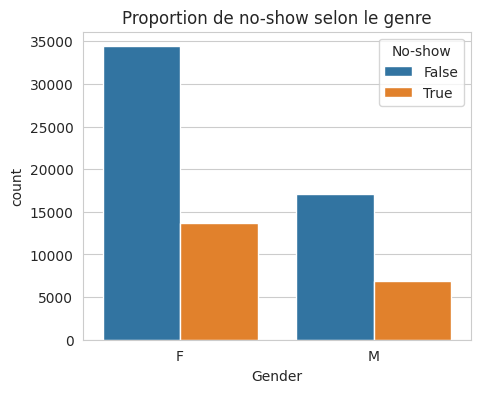

In [96]:
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', hue='No-show', data=df)
plt.title("Proportion de no-show selon le genre")

<Axes: ylabel='count'>

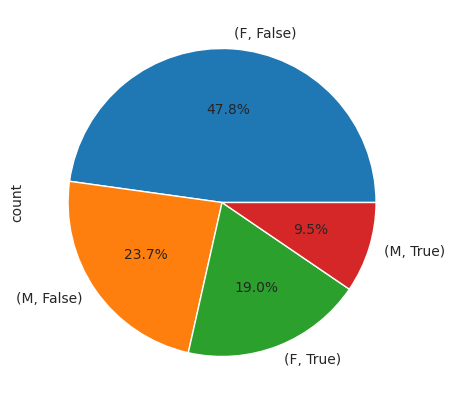

In [97]:
df[['Gender','No-show']].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))

**Q2 . Recevoir un SMS de rappel influence-t-il la probabilité qu’un patient se présente ? Est-ce corrélé avec le nombre de jours entre la prise de rendez-vous et la date du rendez-vous ?**

Text(0.5, 1.0, 'SMS_received et No-show')

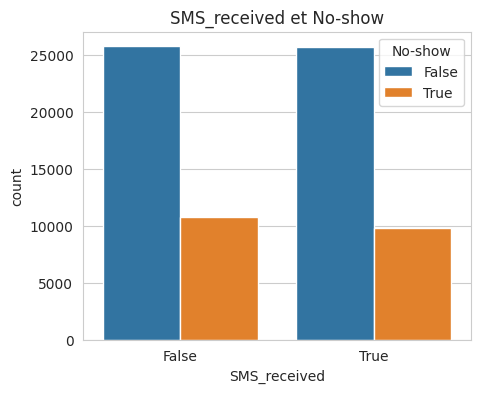

In [98]:
plt.figure(figsize=(5,4))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title("SMS_received et No-show")

On peut consater que le nombre de personnes qui se présentent à leur rendez vous ( barre en bleu ) est quasiment pareil lorqu'ils recoivent ou pas de messages.
Alors les messages n'ont aucune n'influence sur la variable no-show

In [99]:
df['SMS_received'].value_counts()

,count
SMS_received,
False,36477
True,35482


**Q3 . Le délai entre la date de planification (ScheduledDay) et la date du rendez-vous (AppointmentDay) influence-t-il la présence ?**

<Axes: xlabel='No-show', ylabel='WaitingsDays'>

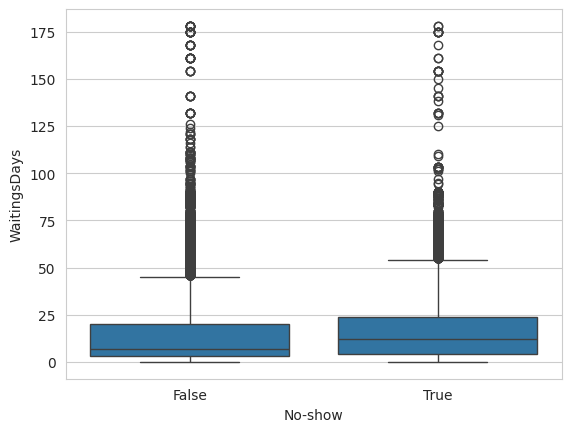

In [100]:
sns.boxplot(x='No-show', y='WaitingsDays',data=df )

**Q4 . Le fait de bénéficier d’une bourse (Scholarship) a-t-il un impact sur la présence à un rendez-vous médical ? Quels groupes d’âge sont les plus concernés par cet effet ?**

Text(0.5, 1.0, 'Scholarship et No-show')

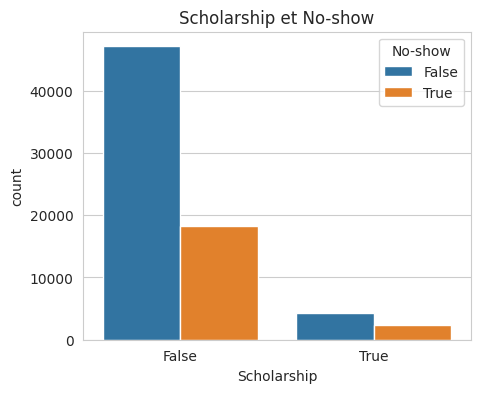

In [101]:
plt.figure(figsize=(5,4))
sns.countplot(x='Scholarship', data=df, hue='No-show')
plt.title("Scholarship et No-show")

**Q5 . Le fait d’avoir certaines maladies (hypertension, diabète, alcoolisme, handicap) influence-t-il la présence à un rendez-vous ? Cet effet varie-t-il selon le genre ?**

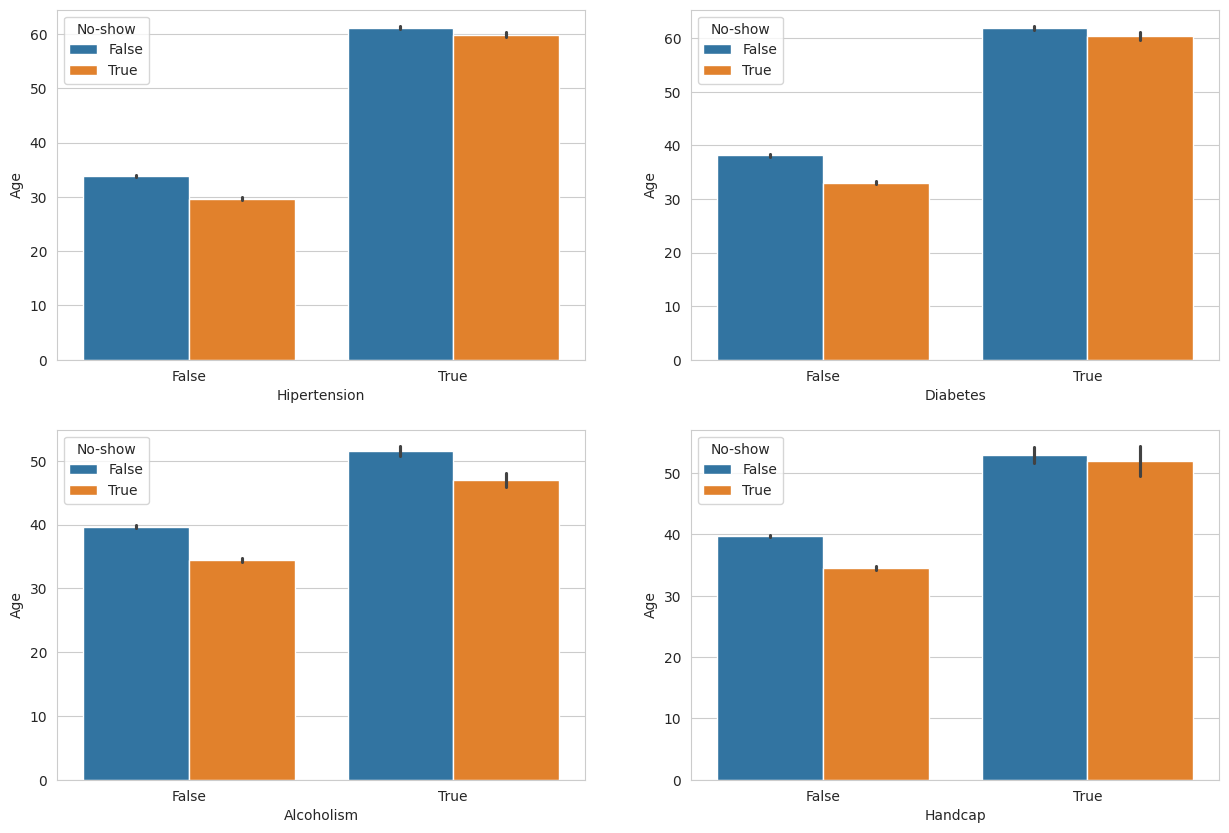

In [105]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hipertension', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = df, hue= 'No-show')
plt.show()